# Week 5

Importing the required libraries

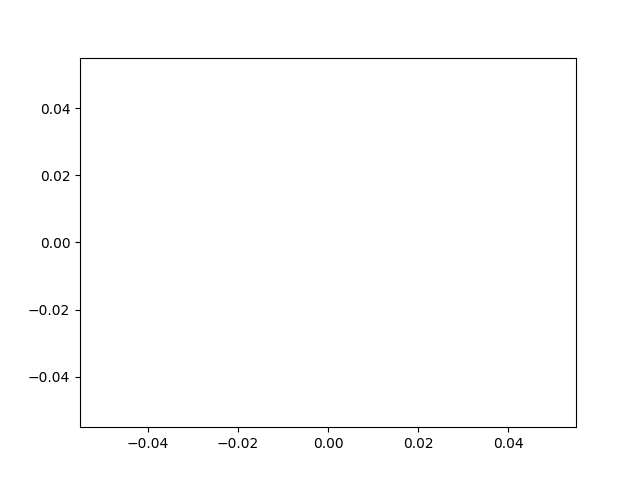

In [9]:
%matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
fig, ax = plt.subplots()
xdata, ydata = [], []
ln, = ax.plot([], [], 'r')
def init():
    ax.set_xlim(-1.2, 1.2)
    ax.set_ylim(-1.2, 1.2)
    return ln,
def update(frame):
    if frame <= 1:xdata, ydata = morph(xs, ys, xt, yt, frame)
    elif frame <= 2:xdata, ydata = morph(xp, yp, xs, ys, frame-1)
    elif frame <= 3:xdata, ydata = morph(xh, yh, xp, yp, frame-2)
    elif frame <= 4:xdata, ydata = morph(xhp, yhp, xh, yh, frame-3)
    elif frame <= 5:xdata, ydata = morph(xo, yo, xhp, yhp, frame-4)
    elif frame <= 6:xdata, ydata = morph(xhp, yhp, xo, yo, frame-5)
    elif frame <= 7:xdata, ydata = morph(xh, yh, xhp, yhp, frame-6)
    elif frame <= 8:xdata, ydata = morph(xp, yp, xh, yh, frame-7)
    elif frame <= 9:xdata, ydata = morph(xs, ys, xp, yp, frame-8)
    elif frame <= 10:xdata, ydata = morph(xt, yt, xs, ys, frame-9)  
    ln.set_data(xdata, ydata)
    return ln,

The update(frame) function defines the logic for which set of points to morph to for each frame of the animation, based on the frame parameter.<br> It updates the xdata and ydata, which are then used to update the ln plot object in the animation.

Here I am writing seperate functions to plot triangle,square,pentagon,hexagon,heptagon and octagon

The input parameter 't' determines no of points to plot 

Then, after that I used numpy to create x and y values and return them from the respective functions

In [10]:
def triangle(t):
    l1 = int(len(t) / 4)
    ts = np.linspace(-0.5, 1, l1)
    ty = np.linspace(0,np.sqrt(3)/2,l1)
    ty2 = (1-ts)/np.sqrt(3) 
    xt = np.concatenate([-0.5*np.ones(l1),ts,ts[::-1], -0.5*np.ones(l1)])
    yt = np.concatenate([ty,ty2,-ty2[::-1],-ty[::-1]])
    return xt,yt

In [11]:
def square(t):
    xs = t
    ys = np.concatenate([1-np.absolute(xs[:100]),-1+np.absolute(xs[100:])])
    return xs,ys

In [12]:
def pentagon(t):
    tp = np.linspace(-0.68, 1, 67)
    tp0 = np.linspace(0,+0.514 ,33)
    xp = np.concatenate([-0.68*np.ones(33),tp,tp[::-1],-0.68*np.ones(33)])
    ty1 = 0.95+0.373*(tp[:46]-0.4567)
    ty2 = -1.85*(tp[46:]-1)
    yp = np.concatenate([tp0,ty1,ty2,-ty2[::-1],-ty1[::-1],-tp0[::-1]])
    return xp,yp

In [13]:
def hexagon(t):
    xh = t
    ty = np.sqrt(3)*(xh[:25]+1)
    yh = np.concatenate([ty,np.sqrt(3)/2*np.ones(50),ty[::-1],-ty,-np.sqrt(3)/2*np.ones(50),-ty[::-1]])
    return xh,yh

In [14]:
def heptagon(t):
    l3 = int(len(t) / 2)
    th = np.linspace(-0.68, 1, 75)
    th0 = np.linspace(0,+0.434 ,25)
    th1 = th[::-1] 
    xhp  = np.concatenate([-0.901*np.ones(25),th,th[::-1],-0.901*np.ones(25)])
    theta = 3.14/7
    ty1 = np.sin(theta)+(1/np.tan(2*theta))*(th[:21]+np.cos(theta))
    ty2 = np.sin(2*theta)-np.tan(theta/2)*(th[21:58]-np.cos(2*theta))
    ty3 = (-1/np.tan(theta))*(th[58:] - 1)
    yhp = np.concatenate([th0,ty1,ty2,ty3,-ty3[::-1],-ty2[::-1],-ty1[::-1],-th0[::-1]])
    return xhp,yhp

In [15]:
def octagon(t):
    theta = 3.14/4
    xo = t
    ty1 = (np.sin(theta)/(1-np.cos(theta)))*(xo[:15]+1)
    ty2 = 1 + (1-np.sin(theta))/np.cos(theta)*(xo[15:50])
    yo = np.concatenate([ty1,ty2,ty2[::-1],ty1[::-1],-ty1,-ty2,-ty2[::-1],-ty1[::-1]])
    return xo,yo

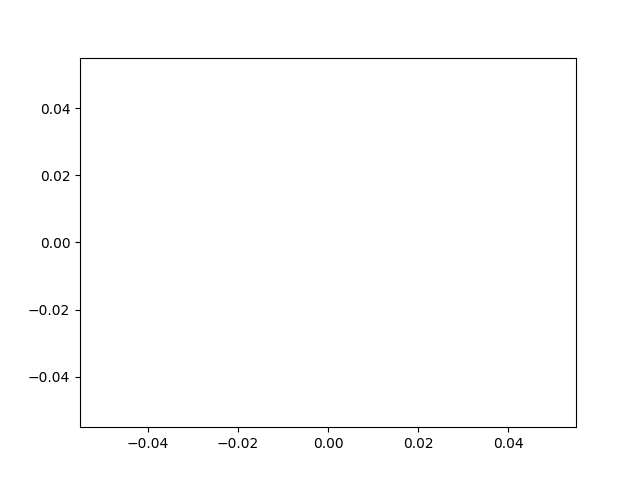

In [16]:
def morph(x1, y1, x2, y2, alpha):
    xm = alpha * x1 + (1-alpha) * x2
    ym = alpha * y1 + (1-alpha) * y2
    return xm, ym
t = np.concatenate([np.linspace(-1,1,100),np.linspace(1,-1,100)])
if len(t) % 4 != 0:
    raise BaseException("Number of points should be multiple of 4...")
xt,yt = triangle(t)
xs,ys = square(t)
xp,yp = pentagon(t)
xh,yh = hexagon(t)
xhp,yhp = heptagon(t)
xo,yo = octagon(t)
ani = FuncAnimation(fig, update, frames=np.linspace(0, 10, 400),
init_func=init, blit=True, interval=15, repeat=True)
plt.show()

The morph function adds morphing effect,by creating intermediate x and y values for given x and y values<br>
We give t as 200 points from -1 to 1 and back to -1 for plotting<br>
then the funcanimation calls update function repeatedly<br>Finally the animation will contain 400 frames and the interval will be in milliseconds
